In [3]:
import torch
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torchvision import utils
print('torch version:',torch.__version__)
print('torchvision version:', torchvision.__version__)

torch version: 1.1.0
torchvision version: 0.2.1


# torchvision.datasets
包含以下数据集：
- MNIST
- COCO
- LSUN Classification
- ImageFolder(严格来说不是数据集)
- Imagenet-12(严格来说不是数据集)
- CIFAT10 and CIFAR100
- STL10  

以MNIST为例，来看看如何调用这些数据集。

In [4]:
datasets.MNIST(root, train=True, transform=None, target_transform=None, download=False)
#参数说明：
# -root:数据集目录
# -train:True,训练集，False:测试集
# -transorm:图片转换相关操作，参见torchvision.transform
# -target_transform:一个函数，通常为transforms.Compose()
# -download:如果数据集不存在，则会从网上下载

NameError: name 'root' is not defined

## ImageFolder 
一个通用的数据加载器，常用于图像分类的数据组织，数据集中的数据由以下方式组织：  
root/dog/xxx.png  
root/dog/xxy.png  
root/dog/xxz.png  

root/cat/123.png  
root/cat/nsdf3.png  
root/cat/asd932_.png  

In [ ]:
datasets.ImageFolder(root, [transform, target_transform])
# 参数同上，方括号表示二选一
#随后会搭配使用torch.utils.data.DataLoader
DataLoader(ImageFolder(root, [transform, target_transform]), batch_size=32, shuffle=True, num+workers=8, pin_memory=1)

# torchvison.transforms.Compose(transforms)
将多个tansforms组合起来使用

In [6]:
transforms.Compose([
                transforms.CenterCrop(10),# 中心裁减10*10
                transforms.Normalize(mean, std) # 
                transforms.ToTensor(), # 数据转为tensor，一般放在最后一步
])

# 其中还有很多其他对图像操作的函数可以使用个，这里仅是简单示意
# 更多图像操作请参考  https://pytorch-cn.readthedocs.io/zh/latest/torchvision/torchvision-transform/

Compose(
    CenterCrop(size=(10, 10))
    ToTensor()
)

# torch.utils.data
torch加载数据的库

In [7]:
class torch.utils,data.Dataset()
# 表示Dataset的抽象类。
# 所有其他数据集都应该进行子类化，所有自雷都应该override  __len__和__getitem__，前者提供了数据集的大小，后者支持数据索引

SyntaxError: invalid syntax (<ipython-input-7-cc958f8062a9>, line 1)

In [ ]:
class torch.utils.data.TensorDataset(data_tensor, target_tensor)
# 包装数据和目标张量的数据集
# 沿着第一个维度索引两个张量来恢复每个样本

In [ ]:
class torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, num_workers=0, 
                                  collate_fn=<function default_collate>, pin_memory=False, drop_last=False)
# 数据加载器，组合数据集和采样器，并在数据集上提供单进程或多进程迭代器
# 参数：
# dataset-加载数据的数据集
# batch_size-每个batch加载多少个样本，默认为1
# shuffle-True时，每个epoch重新打乱数据，默认False
# sampler-定义从数据集中提取样本的策略，若指定，则忽略shuffle参数
# num_workers-用多少个子进程加载数据，0表示在主进程中加载，默认0
# collate_fn-
# pin_memory-
# drop_last-如果数据集不能被batch_size整除，则设置为True后可删除最后不完整的batch，F暗示了，则最后一个batch会小一些

In [ ]:
class torch.utils,data.sampler.Sampler(data_source)
# 所有采样器的基础类
# 每个采样器子类必须提供一个__iter__方法，提供一种迭代数据集元素的方法，以及返回迭代器长度的__len__方法

# 以人脸姿势数据集为例

In [61]:
import os
import torch
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

## face数据集下载地址 https://download.pytorch.org/tutorial/faces.zip
## csv文件保存的是图片人脸特征点数据

In [18]:
landmarks_frame = pd.read_csv('faces/face_landmarks.csv')

n = 64
img_name = landmarks_frame.iloc[n, 0]
landmarks = landmarks_frame.iloc[n, 1:].as_matrix()
landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))


Image name: matt-mathes.jpg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 85. 152.]
 [ 83. 173.]
 [ 83. 195.]
 [ 85. 217.]]


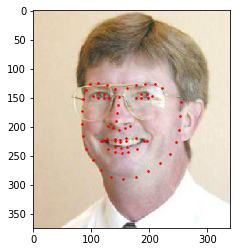

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f756b5a9208>>
Traceback (most recent call last):
  File "/data/cv_test/miniconda3/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
  File "/data/cv_test/miniconda3/envs/py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
  File "/data/cv_test/miniconda3/envs/py36/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/data/cv_test/miniconda3/envs/py36/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/data/cv_test/miniconda3/envs/py36/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


In [65]:
def show_landmarks(image, landmarks):
    '''
    展示一张带标注的图片
    '''
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)
    
plt.figure()
show_landmarks(Image.open(os.path.join('faces/', img_name)), landmarks)
plt.show()

## 自定义Dataset，需要重写\__len__,\__getitem__两个方法

In [66]:
class FaceDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        '''
        csv_file:带有标注信息的csv文件路径
        root_dir:图片所在文件夹
        transform:可选的用于图像预处理方法
        '''
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.landmarks_frame)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = Image.open(img_name)
        landmarks_raw = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks_raw])
        landmarks = landmarks.astype('float').reshape(68, 2)
        sample = {'image':image, 'landmarks':landmarks}
        
        if self.transform:
#             sample = self.transform(sample)
            image = self.transform(Image.fromarray(image))
            landmarks = self.transform(Image.fromarray(landmarks))
            sample = {'image':image, 'landmarks':landmarks}
        return sample

## 下面我们使用自定义数据类型读取4个样本并展示

0 (215, 324) 136


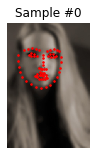

1 (333, 500) 136


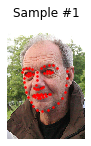

2 (258, 250) 136


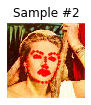

3 (290, 434) 136


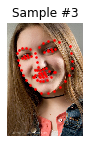

In [69]:
face_datset = FaceDataset(csv_file='faces/face_landmarks.csv',
                             root_dir='faces/')
fig = plt.figure()
for i in range(len(face_datset)):
    sample = face_datset[i]
    print(i, sample['image'].size, sample['landmarks'].size)
    
    ax = plt.subplot(1, 4, i+1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)
    
    if i == 3:
        plt.show()
        break

## 迭代整个数据集

In [64]:
# 先定义一个新建类FaceDataset的实例
transformed_dataset = FaceDataset(csv_file='faces/face_landmarks.csv',
                                 root_dir='faces/',
                                 transform=transforms.Compose([
                                     transforms.Scale(256),
                                     transforms.RandomCrop(224),
                                     transforms.ToTensor()
                                 ]))

dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)

for i_batch, sample in enumerate(dataloader):
    print(i_batch, sample['image'].size())
    break

0 torch.Size([4, 3, 224, 224])
